# Анализ бизнес-показателей Procrastinate Pro+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.  

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

Описание данных
В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.  

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения

## Ознакомление с данными  
### Импорт библиотек и обзор таблиц

In [1]:
#Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
#Сохраняем датасет в переменные
visits = pd.read_csv('/datasets/visits_info_short.csv') #визиты
orders = pd.read_csv('/datasets/orders_info_short.csv') #заказы
costs = pd.read_csv('/datasets/costs_info_short.csv') #расходы

In [3]:
#посмотрим на visits
display(visits.info())
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


visits это у нас визиты, таблица имеет 6 столбцов и 309901 строк     
Столбцы:  
User Id — уникальный идентификатор пользователя, тип int64, название столбца приведем к нижнему регистру     
Region — страна пользователя, тип object, название столбца приведем к нижнему регистру    
Device — тип устройства пользователя, тип object, название столбца приведем к нижнему регистру    
Channel — идентификатор источника перехода, тип object, название столбца приведем к нижнему регистру    
Session Start — дата и время начала сессии, тип object поменяем на datetime, название столбца приведем к нижнему регистру и заменим пробел
Session End — дата и время окончания сессии, тип object поменяем на datetime, название столбца приведем к нижнему регистру и заменим пробел  

In [4]:
#посмотрим на orders
display(orders.info())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


orders имеет 3 столбца и 40212 строк     
Столбцы:  
User Id — уникальный идентификатор пользователя, тип int64, название столбца приведем к нижнему регистру  
Event Dt — дата и время покупки, тип object поменяем на datetime, название столбца приведем к нижнему регистру и заменим пробел   
Revenue — сумма заказа, тип float64 название столбца приведем к нижнему регистру  

In [5]:
#посмотрим на costs
display(costs.info())
display(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


costs имеет 3 столбца и 1800 строк, названия столбцов для удобства дальнейшей работы приведем к нижнему регистру      
Столбцы:    
dt — дата проведения рекламной кампании, тип object для дальнейшей работы необходимо поменять на datetime  
Channel — идентификатор рекламного источника, тип object, название столбца приведем к нижнему регистру  
costs — расходы на эту кампанию, тип float64  

In [6]:
#проверим наши таблицы на наличие явных дубликатов и на пропуски
display(visits.duplicated().sum())
display(visits.isna().sum())

0

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [7]:
display(orders.duplicated().sum())
display(orders.isna().sum())

0

User Id     0
Event Dt    0
Revenue     0
dtype: int64

#### Промежуточный итог
Мы имеем 3 таблицы: visits, costs, orders.  
visits хранит лог о посещениях,    
costs хранит данные о рекламных расходах,  
orders хранит выгрузку покупок,    
нам необходимо будет поменять стиль названия столбцов таблиц, т.е. привест к нижнему регистру, заменить пробелы на подчеркивание и поменять формат дат с object на datetime для удобства в дальнейшей работе.  
Предварительно заключаем, что явных дубликатов и пропусков нет.

### Подготовка данных
#### Стиль

In [8]:
#приведем наименование столбцов в таблицах в порядок, 
visits.columns = [title.lower().replace(' ', '_') for title in visits.columns]
orders.columns = [title.lower().replace(' ', '_') for title in orders.columns]
costs.columns = costs.columns.str.lower()

#смотрим результат
display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

#### Время

In [9]:
#изменяем тип данных дат с object до datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date #уточняем что работаем датой, т.к. изначально только она и присутствует

In [10]:
#проверяем
display(visits.head())
display(visits.info())
display(orders.head())
display(orders.info())
display(costs.head())
display(costs.info())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

### Итог ознакомления и подгтовки данных
Итак из обзора мы имеем 3 таблицы:  
visits это у нас визиты, таблица имеет 6 столбцов и 309901 строк,  
orders имеет 3 столбца и 40212 строк,  
costs имеет 3 столбца и 1800 строк.  
Во всех 3-х таблицах, мы привели к единому стилю наименование столбцов, т.е. заменили пробелы на подчеркивания, а так же привели к строчному написанию. 
В столбцах visits['session_start'], visits['session_end'], orders['event_dt'], costs['dt'] данные были указаны как object, для дальнейшей работы с ними, мы изменили их на datetime.  
При проверке пропуски и явные дубликаты не обнаружены.  

## Функции для расчёта и анализа 
### Функции для вычисления значений метрик
#### Пользовательские профили

In [11]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Удержание (retention rate)

In [12]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Конверсия


In [13]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Лайфтайм и окупаемость (LTV и ROI)

In [14]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функции для построения графиков
#### Cглаживание данных

In [15]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Построения графика удержания (retention rate)

In [16]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Визуализация конверсии

In [17]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Визуализация лайфтайма и окупаемости (LTV и ROI)

In [18]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(24, 12))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных
### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [19]:
#составляем профили вызвав get_profiles
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [20]:
#определяем минимальную и максимальные даты
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
display(min_date, max_date)

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

**Вывод:**  
Профили составлены, функция работает. По профилям мы видим что у нас есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, что соответствует заданию т.к. "сегодня 1 ноября 2019 года", анализ можно провести с учетом отсутствия сведений за 28-30 октября.

### Разбивка пользователей по странам.

In [21]:
# Построим таблицу, отражающую общее и платящее количество пользователей с разбивкой по странам 
payer_region = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
payer_region.columns = ['total_users', 'payer_users', 'percent']
payer_region.sort_values(by= 'payer_users', ascending = False).style.format({'payer_users': '{:.0f}',
                                                                       'percent': '{:.2%}'})

,total_users,payer_users,percent
region,,,
United States,100002,6902,6.90%
UK,17575,700,3.98%
France,17450,663,3.80%
Germany,14981,616,4.11%


**Вывод:**
По всем трем показателям США лидируют, притом довольно значительно. Остальные 3 страны находятся примерно на одном уровне, но стоит отметить что хоть в Германии наименьшее количество пользователей, конверсия выглядит получше чем в Великобритании и Франции, пока отметим это.

### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [22]:
#Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства
payer_device =  profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
payer_device.columns = ['total_users', 'payer_users', 'percent']
payer_device.sort_values(by= 'payer_users', ascending = False).style.format({'payer_users': '{:.0f}',
                                                                       'percent': '{:.2%}'})

,total_users,payer_users,percent
device,,,
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
Mac,30042,1912,6.36%
PC,30455,1537,5.05%


**Вывод:**
На таблице мы видим что пользователи продукции компании Apple демонстрируют лучшие цифры. Наибольшее количество пользователей а также платящих пользователей приходятся на iPhone, при это наибольший процент платящих пользователей мы видим у Mac.  
Так же стоит обратить внимание что наименьшее количество пользователей с низкой конверсией приходятся на пользователей PС.

### Рекламные источники привлечения и каналы, из которых приходит больше всего платящих пользователей. 


In [23]:
#Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
payer_channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
payer_channel.columns = ['total_users', 'payer_users', 'percent']
payer_channel.sort_values(by= 'payer_users', ascending = False).style.format({'payer_users': '{:.0f}',
                                                                       'percent': '{:.2%}'})

,total_users,payer_users,percent
channel,,,
FaceBoom,29144,3557,12.20%
TipTop,19561,1878,9.60%
organic,56439,1160,2.06%
WahooNetBanner,8553,453,5.30%
AdNonSense,3880,440,11.34%
RocketSuperAds,4448,352,7.91%
LeapBob,8553,262,3.06%
OppleCreativeMedia,8605,233,2.71%
lambdaMediaAds,2149,225,10.47%


**Вывод:**
Наиболее эффективным каналом привлечения пользователей выглядит FaceBoom, по количеству привлеченных пользователей (29144) этот канал занимает второе место, но лидирует в 2 других показателях имея наибольшее абсолютное количество платящих пользователей (3557) и лучший процент платящих пользователей(12.2%). 
Канал TipTop занимает 3 место общему количеству привлеченных пользователей(19561), и второе по платящим пользователям(1878), правда с 9.6% платящих пользователей, канал занимает только 4 позицию по этому показателю.
Ну и не стоит обделять вниманием органических пользователей, которых больше всех (56439) и хоть они имеют скромные 2,06% платящих пользователей, но количественно это 1160 платящих пользователей, с которыми они занимают 3 позицию по этому показателю. И так же несомненный плюс этих пользователей в том что они "бесплатны", ведь на их привлечение не потрачен бюджет. 

### Вывод по анализу данных
   По имеющимся данным с 1 мая по 27 октября 2019 года приложения Procrastinate Pro+ наибольшее количество пользователей зафиксировано в ***США***, а именно ***100 002 пользователя***, из которых ***6902 платищие пользователи***, что составляет ***6.9%***. В остальных странах (Франция/Великобритания/Германия) показатели более скромные, количество пользователей варьируется 14981-17575, а конверсия во всех случаях около 4%, хотя стоить отметить что Германия имея наименьшее количество пользователей демонстрирует наибольшую конверсию в 4.11%.  
   Наиболее распространенное устройство среди пользователей это ***iPhone*** (***54 479*** пользователей) и среди них так же наибольшее количество платящих пользователей(***3382***), но при всем этом по конверсии лидируют пользователи ***Mac*** (***6,36%***).  
   По канал привлечения пользователей, наибольшее количество пользователей приложения являются ***органическими*** (***56439*** пользователей), с довольно низкой конверсией в оплату (***2.06%***) и второй по величине группой пользователей являются привлеченные по каналу ***FaceBoom*** (***29144***), при этом здесь наибольшее количество платящих пользователей(***3557***) и лучшая конверсия (***12.2%***)

## Маркетинг
### Общая сумма расходов на маркетинг.


In [24]:
round(costs['costs'].sum(), 1)

105497.3

###  Распределение средств по рекламным источникам.


In [25]:
channel_cost = profiles.groupby('channel').agg({'acquisition_cost': ['sum']})
channel_cost.columns = ['total_cost']
channel_cost['cost_percent'] = (channel_cost['total_cost'] / costs['costs'].sum())
channel_cost.sort_values(by = 'total_cost', ascending = False).style.format({'total_cost': '{:.0f}',
                                                                            'cost_percent':'{:.2%}'})

,total_cost,cost_percent
channel,,
TipTop,54751,51.90%
FaceBoom,32446,30.75%
WahooNetBanner,5151,4.88%
AdNonSense,3911,3.71%
OppleCreativeMedia,2151,2.04%
RocketSuperAds,1833,1.74%
LeapBob,1798,1.70%
lambdaMediaAds,1558,1.48%
MediaTornado,954,0.90%


**Вывод:**  
Общая сумма рекламных трат составила 105 497.3, и при этом каналы TipTop и FaceBoom выделяется 82,65% от всех трат. 

### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

In [26]:
# Добавим столбцы week и month для дальнейшей работы
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week 
costs['month'] = pd.to_datetime(costs['dt']).dt.month
display(costs.head(1), costs.tail(1))

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5


,dt,channel,costs,week,month
1799,2019-10-27,lambdaMediaAds,12.0,43,10


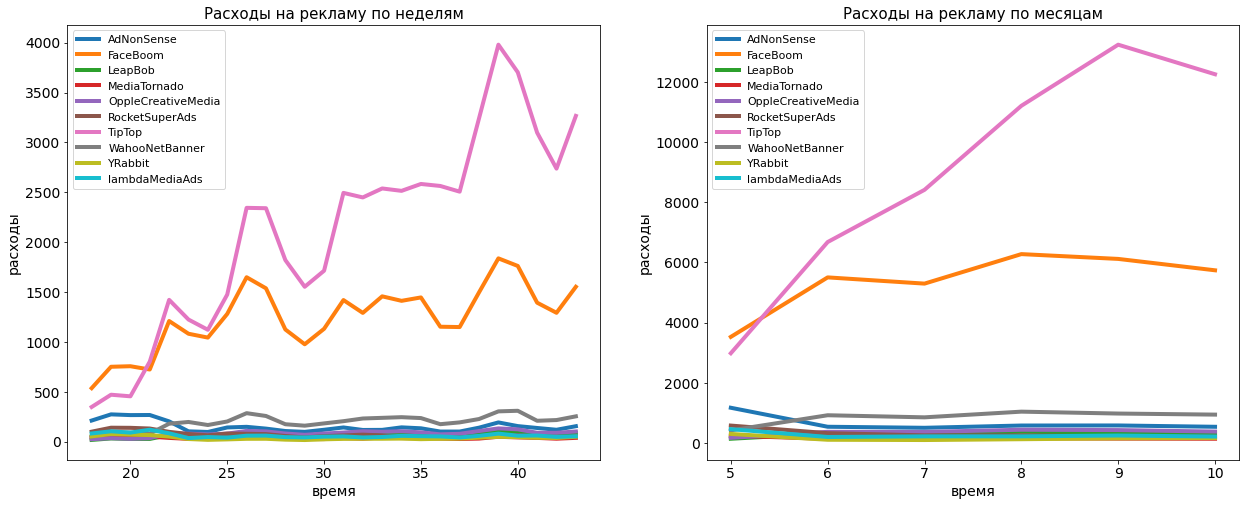

In [27]:
#построим график по неделям и по месяцам
columns = {'week': 'Расходы на рекламу по неделям', 'month': 'Расходы на рекламу по месяцам'}
plt.subplots(figsize = (21, 8))
for i, col in enumerate(columns.keys()):
    costs.pivot_table(index = col, columns = 'channel', values = 'costs', aggfunc = 'sum').plot(ax = plt.subplot(1, 2, i + 1), linewidth = 4)
    plt.title(columns[col], fontsize=15)
    plt.xlabel('время', fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel('расходы', fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=11)
plt.show()

**Вывод:**  
По графикам видно что расходы на рекламу в TipTop и FaceBoom значительно больше чем по другим каналам.
По левому графику видно, что рост расходов на рекламу в TipTop и FaceBoom происходят примерно в одно время, скорее всего это связана с рекламными компаниями. А так же что пиковых показателей они достигли примерно к 39 неделе.  
А по правому графику мы видим что значительный рост расходов идет именно по каналу TipTop, до сентября, далее идет некоторый спад. А вот канал FaceBoom растет не так резко, до августа, а далее идет некоторый спад. 

### Средняя стоимость привлечение одного пользователя (CAC) из каждого источника.

In [28]:
cac_cost = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').sort_values('acquisition_cost', ascending = False)
cac_cost

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [29]:
# Посчитаем средний САС на одного пользователя, при этом исключим органиков, т.к. у них нет стоимости.  
round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2)


1.13

**Вывод:**  
Самыми дорогими пользователями оказались привлеченные по каналу TipTop, средний расход на каждого пользователя составил 2.79, при этом средний САС составил 1.13

### Вывод по маркетингу
Общие расходы на рекламу в заданный период составили 105497,3, из них 82,65% средств были выделени на 2 канала, а именно TipTop и FaceBoom. При этом пользователи привлеченные через TipTop оказались самыми дорогими, средний их CAC составил 2,79, что в 2,4 раза больше чем стоимость привлеченных через FaceBoom.  
Графики же нам показали что расходы на рекламу через TipTop значительно росли до сентября, а потом был некоторый спад. Расходы на рекламу через FaceBoom то росли то поднимались, но в целом демонстрировали плавный  рост, до августа, но далее также заметен спад.

## Окупаемость рекламы


In [30]:
#сперва исключим органических пользователей из наших метрик, так как они у нас являются "бесплатными"
profiles = profiles.query('channel != "organic"')

In [31]:
# устанавливаем даты, момент анализа 1 ноября 2019 года, а горизонт анализа задаем в 2 недели
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14  

### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.


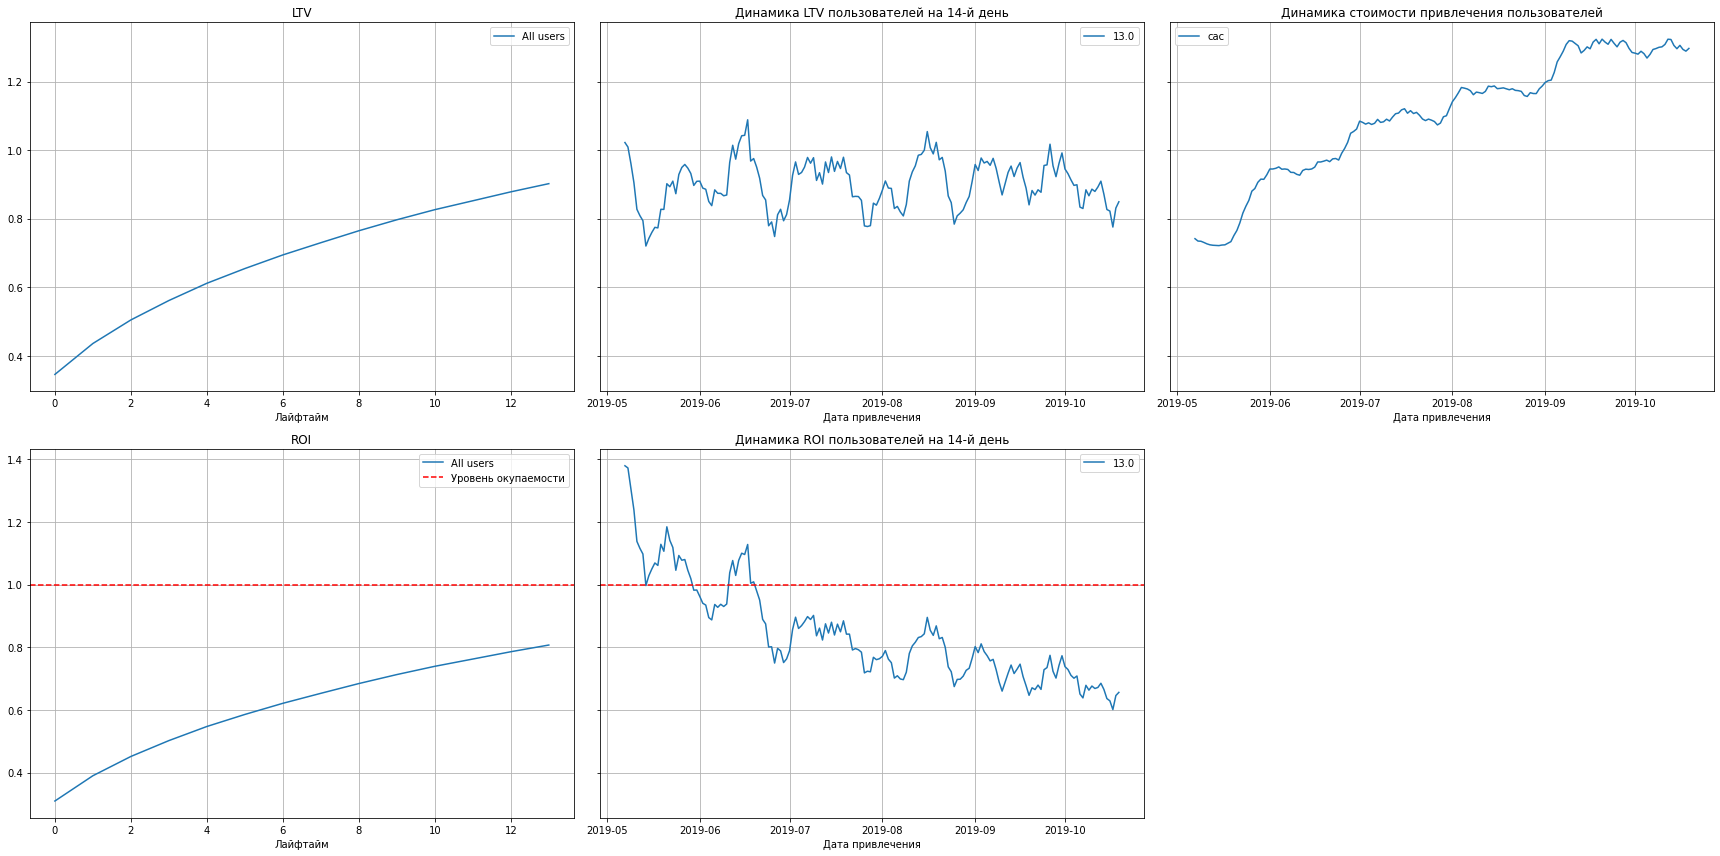

In [32]:
#Рассчитаем и визуализируем LTV и ROI, а также графики динамики LTV, CAC и ROI.
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**  
LTV в общем стабилен, хоть и в динамике он немного скачет.   
CAC растёт до сентября и выравнивается. Возможно это связано с тем, что расходы на рекламу через "TipTop" увеличивались до этого времени.     
Бросается в глаза график ROI, он ниже уровня окупаемости и находится примерно на уровне 80% при этом динамика ROI показывает что реклама окупалась в мае и в начале июня, но всё же показывает постоянное падение.   

### Конверсия и удержание пользователей,  а также их динамика изменений в графиках.

#### Конверсия и её динамика.

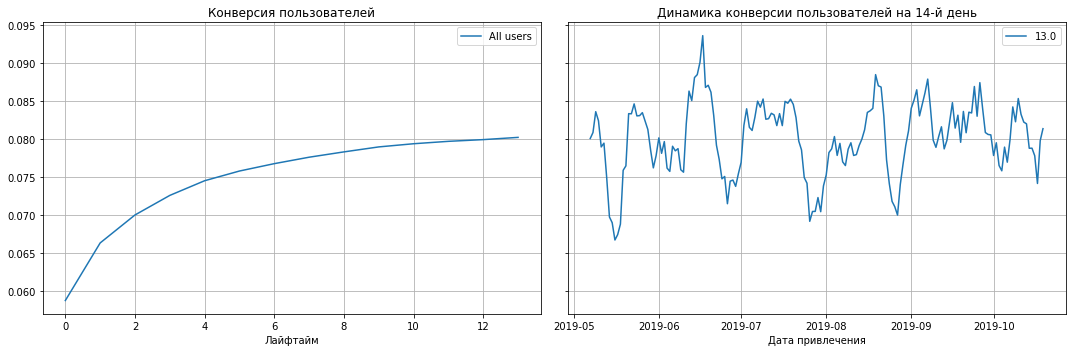

In [33]:
#графики конверсии и её динамика
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод**
Конверсия пользователей стабильная, отклонений не видно.
В динамике 14го дня видно что идут сильные колебания между ростом и падением с начала наблюдаемого периода до конца августа, а далее в сентября и октябре наблюдается некоторое выравнивание. 

#### Удержание и её динамика

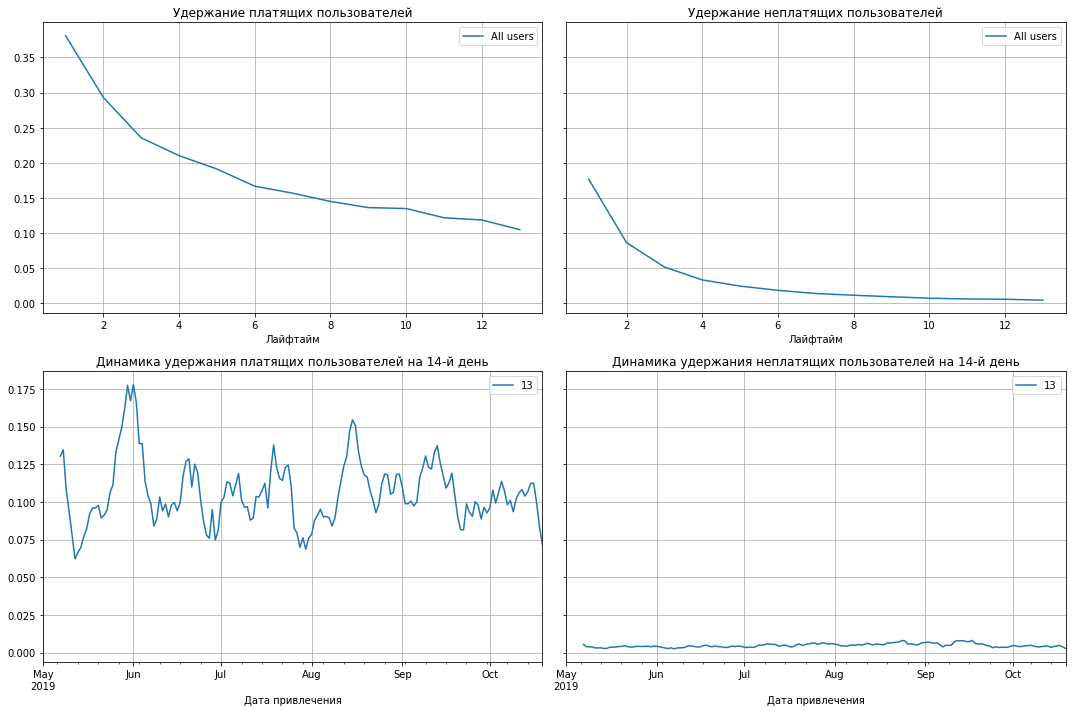

In [34]:
# графики удержания платящих и не платяхщих пользователей и её динамика
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**  
По верхним двум графикам мы видим что удержание снижается со временем, а также что удержание платящих пользователей выше, чем неплатящих. Всё в норме.   
График динамики удержания платящих пользователей показывает, что наибольшее удержание было в конце мая и в начале июня, а наименьшее в середине мая. График динамики удержания неплатящих пользователей показывает что весь наблюдаемый период он крайне низок.

### Анализ окупаемости рекламы с разбивкой по устройствам. 
#### Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


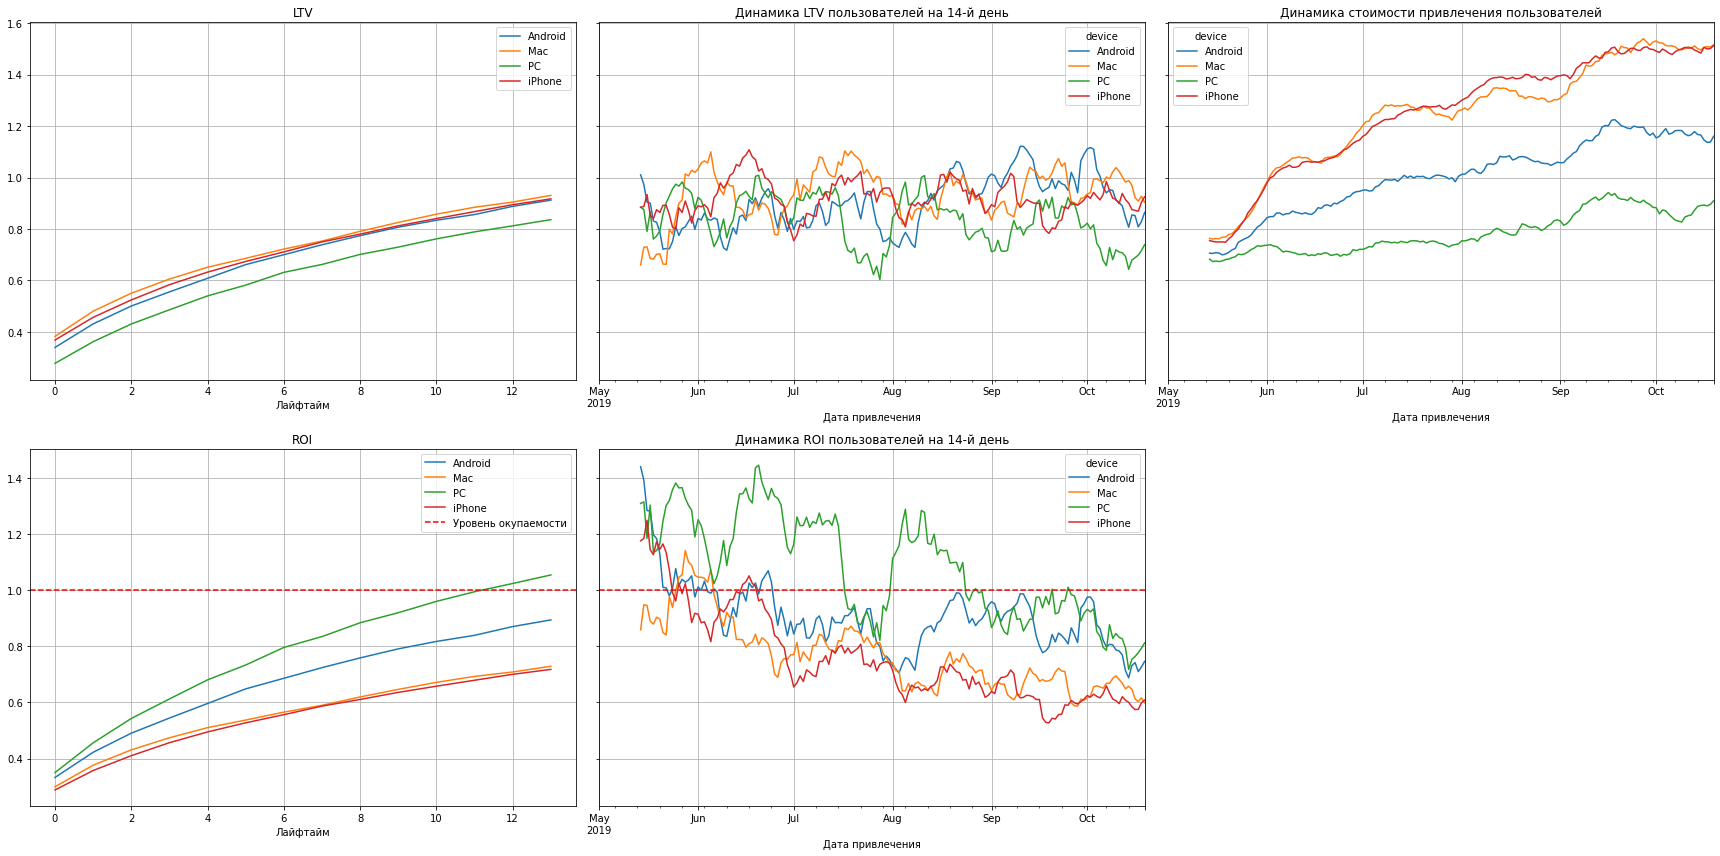

In [35]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**  
Графики с разбивкой на устройства показывают что самые низкие показатели LTV в наблюдаемый период на PC.  
Динамика стоимости привлечения пользователей показывает что самые дорогие пользователи на iPhone и Mac, при этом до уровня окупаемости доходит только PC, а ранееупомянутые пользователи iPhone и Mac находятся примерно в 70%. Динамика же ROI показывает что падение окупаемости произошло еще в июне, но окончательно, окупаемость на всех устройствах, упала к сентябрю.

#### Конверсия и удержание пользователей,  а также их динамика изменений в графиках.

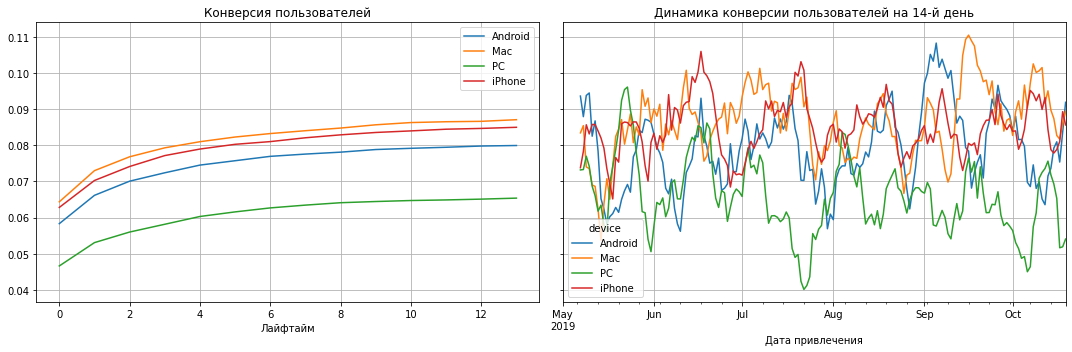

In [36]:
# конверсия
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

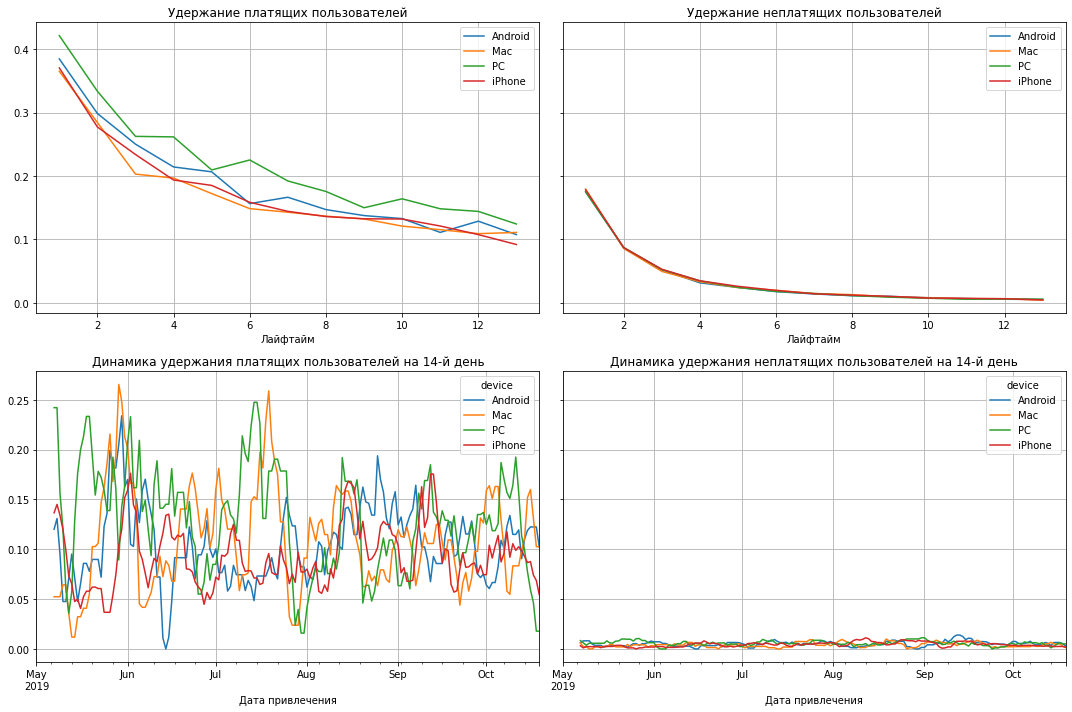

In [37]:
#удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**  
По конверсии пользователей, мы видим что она значительно ниже у PC, а динамика конверсии говорит о она иногда вовсе падает почти к нулю.  
Удержание платящих и неплатящих пользователей стабильна и почти одинакова среди пользователей различных девайсов.
По динамике удержания платящих пользователей видны сильные колебания до начала августа, затем идет некоторое выравнивание.  
Динамика удержания неплатащих пользователей стабильно близка к нулю.

### Анализ окупаемости рекламы с разбивкой по странам. 
#### Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


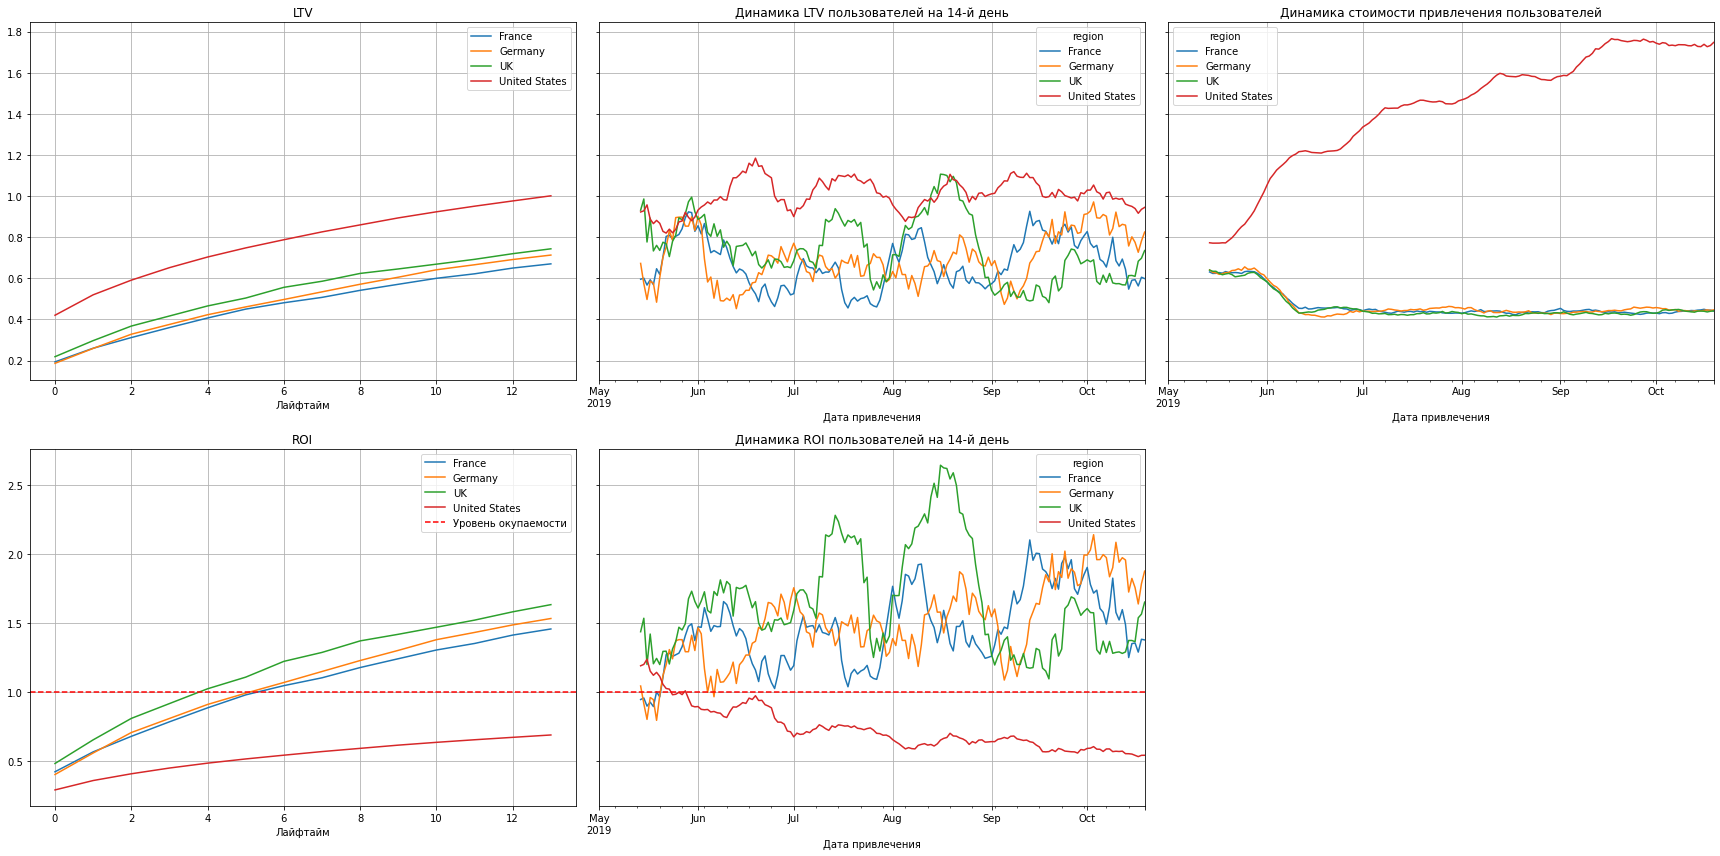

In [38]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**
Динамика CAC показывает что самыми дорогими пользователями являются американцы (так же мы помним что они наиболее крупная группа)и их стомость с июня постоянно и сильно росла, когда как стомость других стран упала и выровнялась.   
График же ROI и динамики ROI позывают что только американцы не окупаются.  
LTV же остается достаточно стабильным. 

#### Конверсия и удержание пользователей,  а также их динамика изменений в графиках.

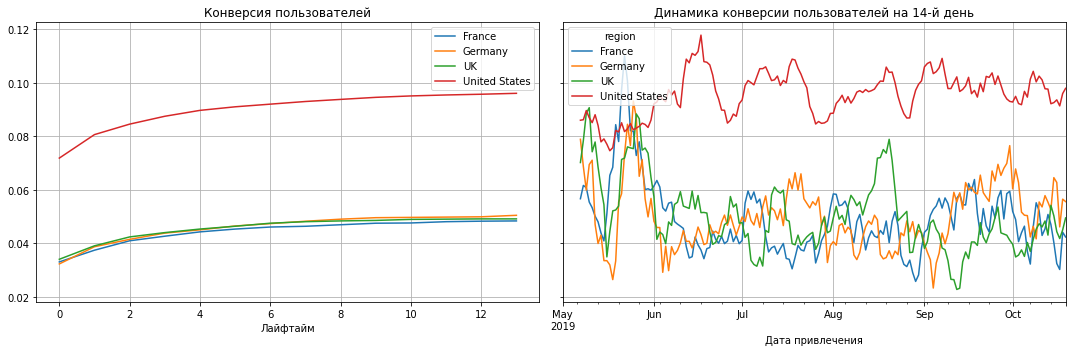

In [39]:
#конверсия
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

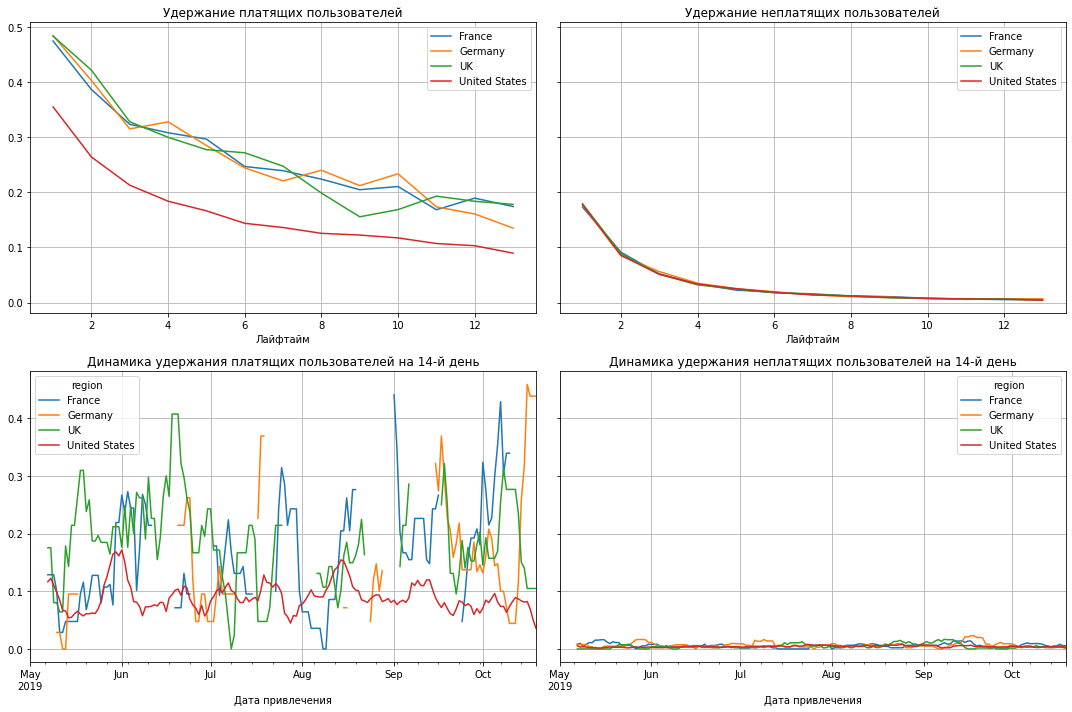

In [40]:
#удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**  
Конверсия американских пользователей гораздно выше чем у европейцев. В динамике конверсии видно что у европейских пользователей был всплеск к концу мая и дальнейшее падение, а у американцев произошел рост в начале июня.   
При этом удержание платящих американцев ниже чем европейцев. 


### Анализ окупаемости рекламы с разбивкой по рекламным каналам. 
#### Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


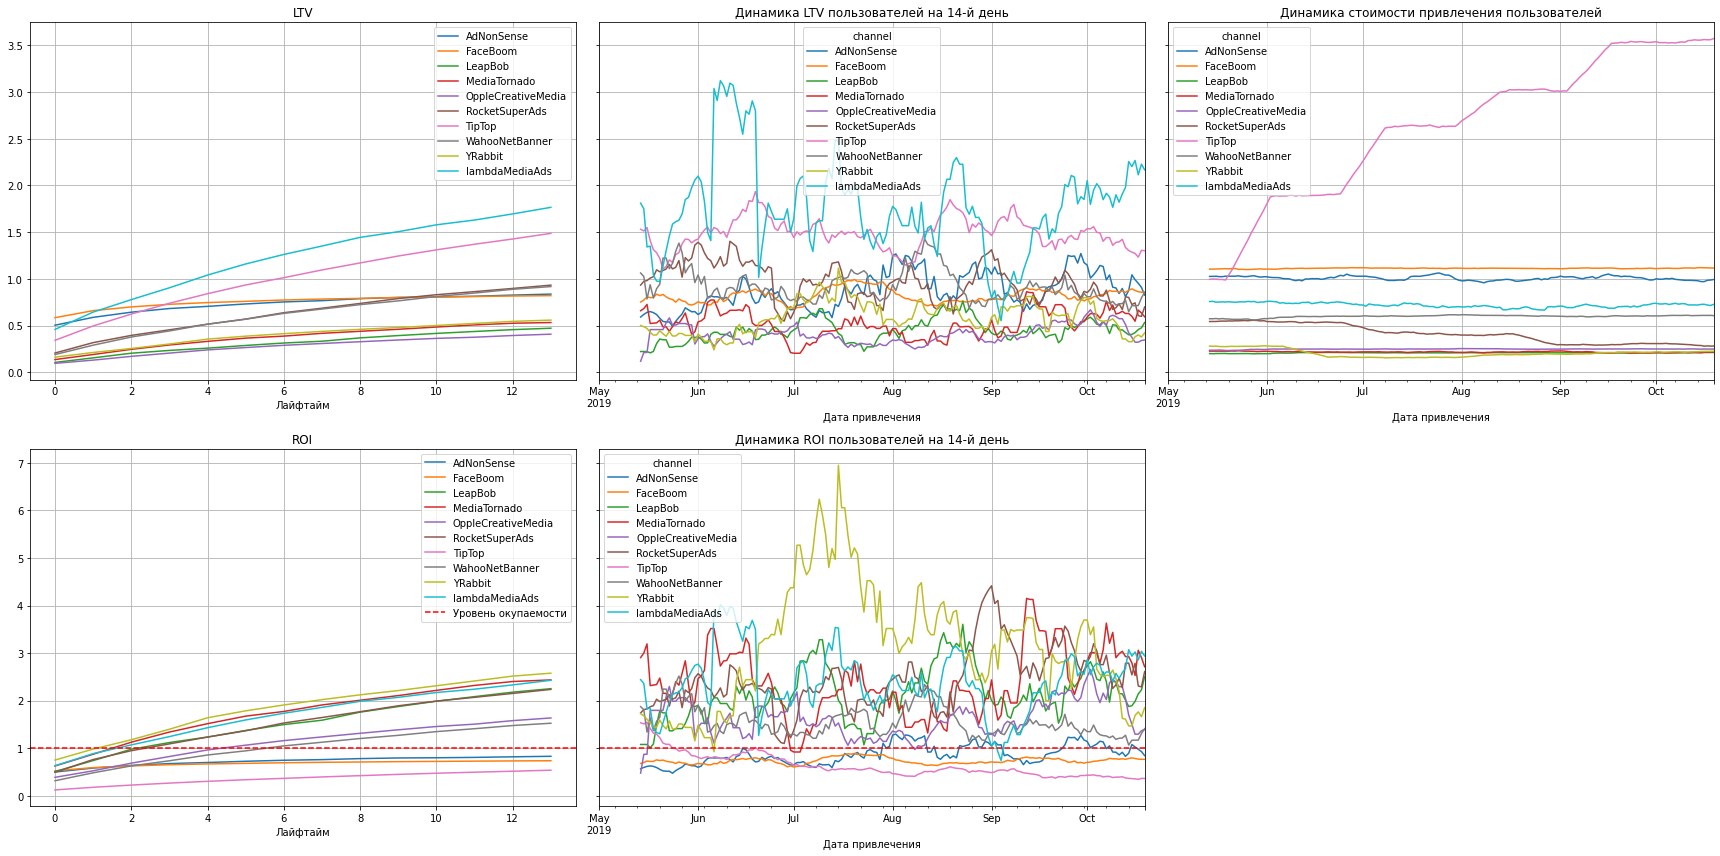

In [41]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**  
LTV стабилен. 
Динамика САС очень отчетливо показывает что идет значительный ежемесячный рост стоимости привлечения клиентов через TipTop.  
И при этом ROI показывает что самые дорогие каналы привлечения клиентов TipTop и FaceBoom  не окупаются, а динамика ROI говорит что они и не окупались за весь наблюдаесый период. 

#### Конверсия и удержание пользователей,  а также их динамика изменений в графиках.

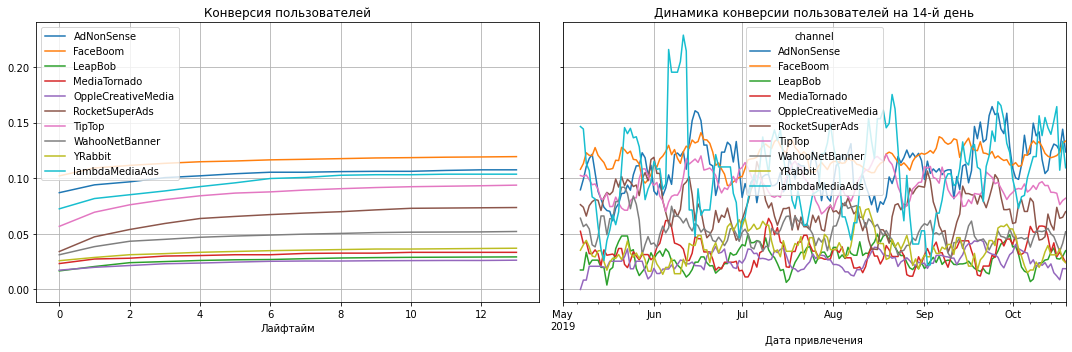

In [42]:
#конверсия
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

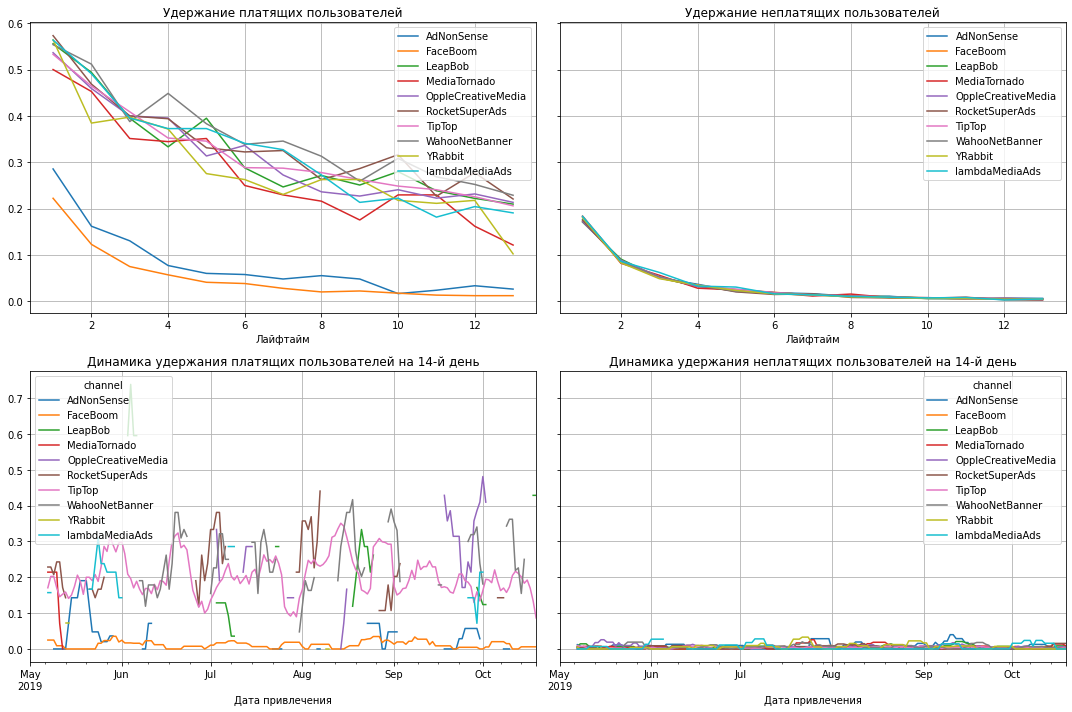

In [43]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
Конверсия пользователей у всех каналов находится на разном уровне, скорее всего это связано с общим количеством пользователей и выделяемыми средствами для привлечения клиентов. Но можно отметить что конверсия пользователей, привлечённых из каналов FaceBoom и AdNonSense, выше конверсий пользователей, привлечённых из других каналов. Конверсия пользователей, привлечённых из канала TipTop, несколько ниже.   
Удержание платящих пользователей из FaceBoom и AdNonSense намного ниже, чем пользователей из других каналов, TipTop же показывает средний уровень. 

### Вывод по окупаемости рекламы.

Анализ данных за наблюдаемый период показывает что во всех случаях **LTV** стабилен.  
**Динамика стоимости привлечения пользователей** показывает что в целом идет постоянный рост стоимости рекламы. 
- При разбивке по устройствам мы выявили что самыми дорогими оказались пользователи с устройств iPhone и Mac. Их стоимость растет с июня, достигая пика в сентябре и после выравнивается.
- При разбивке по странам наблюдается похожая картина, но с пользователями из США, у них так же идет большой рост стоимости привлечения с июня, но уже, до середины сентября и так же выравнивается.
- При разбивке по рекламным каналам привлечения клиентов видно что похожая картина вырисовывется у TipTop, так же рост с июня по середину сентября и дальнейшее выравнивание стоимости.

Графики **ROI** в целом показывают что  инвестиции в рекламу не окупаются, находясь примерно на уровне 80%.
- При разбивке по устройствам мы видим на графиках что окупаются только пользователи PC.
- При разбивке по странам не окупаются только пользователи из США.
- При разбивке по рекламным каналам привлечения клиентов мы видим что крупнейшие каналы привлечения TipTop и FaceBoom не окупаются.

Графики **динамики ROI пользователей на 14-й день** показыват что реклама окупалась в мае и в начале июня, но всё же показывает постоянное падение.
- При разбивке по устройствам видно что единственными окупаемыми до сентября оказывались пользователи PC, но в дальнешем и они не окупались.
- При разбивке по странам видно падение США ниже уровня в начале июня и более они не окупались, в отличие от представителей других стран, которые все находятся выше уровня окупаемости. 
- При разбивке по рекламным каналам привлечения клиентов снова видим что крупнейшие каналы привлечения TipTop и FaceBoom не окупаются.

Графики **конверсии** и её динамики показывают общем показывают стабильность.
- При разбивке по устройствам видно что пользователи PC находятся значительно ниже.
- При разбивке по странам США ожидаемо впереди, т.к. у них самые высокие затраты на рекламу и самое большое количество пользователей.
- При разбивке по рекламным каналам привлечения клиентов видим что конверсия пользователей, привлечённых из каналов FaceBoom и AdNonSense, выше конверсий пользователей, привлечённых из других каналов.

Графики **удержания платящих пользователей** и её динамики на 14-й день в целом показывают что она выше удержания неплатящих, что должно быть так.
- При разбивке по устройствам удержание платящих и неплатящих пользователей стабильна и почти одинакова среди пользователей различных девайсов. По динамике удержания платящих пользователей видны сильные колебания до начала августа, затем идет некоторое выравнивание.
- При разбивке по странам видно что удержание платящих американцев ниже чем европейцев.
- При разбивке по рекламным каналам привлечения клиентов видно что удержание платящих пользователей из FaceBoom и AdNonSense намного ниже, чем пользователей из других каналов, TipTop же показывает средний уровень.

## Общие выводы исследования


* В рамках полученного задания на анализ рекламной компании приложения Procrastinate Pro+ были проведены следующие действия: 
- Предобработка данных а именно, проверка на наличие явных дубликаты и пропуски, изменены типы данных.
- Прописаны функции для расчёта и анализа основных бизнес-показателей: 
- Исследовательский анализ данных 
- Визуализация бизнес-показателей в виде графиков с результатами расчётов функций.
- Произведен анализ окупаемости рекламы по разным разбивкам: по видам устройств, по странам и по каналам привлечения, и по регионам их использования. 
- По результатам каждого шага прописаны выводы.

* Наибольшее количество пользователей используют iPhone, территориально большинство пользователей проживает в США, а самыми крупными каналами привлечения клиентов являю TiTop и FaceBoom. Исходя из нашего анализа, можно утверждать, что именно эти 3 категории являются самыми дорогими и не окупающимися пользователями. Самые дорогие пользователи используют iPhone и не окупаются. Самые дорогие пользователи из США и они тоже не окупаются и хуже всего удерживаются платящие пользователи. Самые дорогие пользователи привлечены через TipTop и FaceBoom и они тоже не окупаются.


* Рекомендации для отдела маркетинга по пересмотру распределение бюджета:
- По каналам привлечения клиентов. А именно сокращения расходов на TipTop, FaceBoom и AdNonSense (из-за крайне низкого удержания), и обратить внимание на другие каналы, например lambdaMediaAds который имеет 10.47% платящих пользователей и RocketSuperAds с 7.91% платящих пользователей, также эти каналы имеют хорошую окупаемость.
- По странам возможно имеет смысл увеличить расходы на рекламы в Европе, т.к. там таких трат очень мало, но они имеют хорошую окупаемость с примерно 4% платящих пользователей которые хорошо удерживаются. 
